In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
books = pd.read_csv("D:/book/Books.csv")
ratings = pd.read_csv("D:/book/Ratings.csv")
users = pd.read_csv("D:/book/Users.csv")

C:\Users\Reshav\AppData\Local\Temp\ipykernel_17696\1204483425.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("D:/book/Books.csv")


In [4]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [5]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [6]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [7]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [13]:
# Duplicates
books.duplicated().sum()

0

In [14]:
# Duplicates
users.duplicated().sum()

0

In [15]:
# Duplicates
ratings.duplicated().sum()

0

## Explanatory Data Analysis (EDA)

In [16]:
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [17]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [18]:
mergedData = ratings.merge(books, on='ISBN')
mergedData.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [19]:
mergedData.drop(columns=["ISBN","Image-URL-L","Image-URL-S","Image-URL-M"],axis=1,inplace=True)
mergedData

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...
1031131,276688,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031132,276688,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031133,276690,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple
1031134,276704,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


In [20]:
df = mergedData.merge(users.drop("Age", axis=1), on="User-ID")
df.head()

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location
0,276725,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa"
1,2313,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa"
2,2313,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa"
3,2313,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa"
4,2313,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   Book-Rating          1031136 non-null  int64 
 2   Book-Title           1031136 non-null  object
 3   Book-Author          1031135 non-null  object
 4   Year-Of-Publication  1031136 non-null  object
 5   Publisher            1031134 non-null  object
 6   Location             1031136 non-null  object
dtypes: int64(2), object(5)
memory usage: 62.9+ MB


In [22]:
data = df[['User-ID', 'Book-Rating', 'Book-Title', 'Book-Author', 'Year-Of-Publication', ]]

# Handling missing values
data.dropna(inplace=True)

C:\Users\Reshav\AppData\Local\Temp\ipykernel_17696\2228602579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [23]:
data = data.sample(frac=0.01)

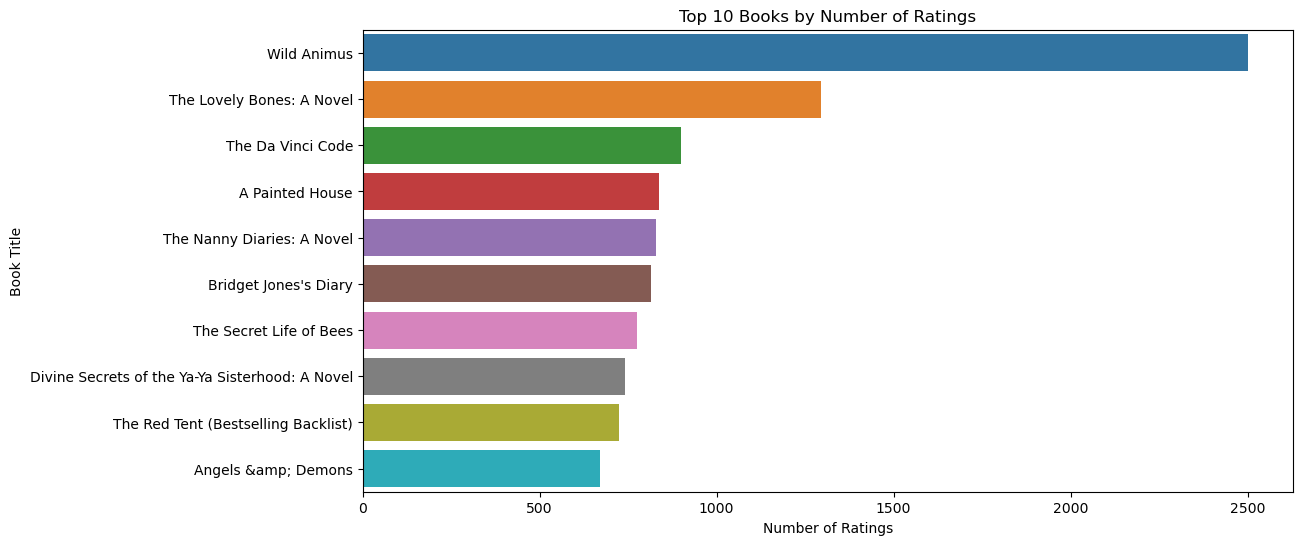

In [25]:
#Bar plot to show Top 10 books by Number of Ratings
ratings_with_name = ratings.merge(books, on='ISBN')
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_rating'},inplace=True)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='num_rating', y='Book-Title', data=num_rating_df.sort_values(by='num_rating', ascending=False).head(10))
plt.title('Top 10 Books by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()

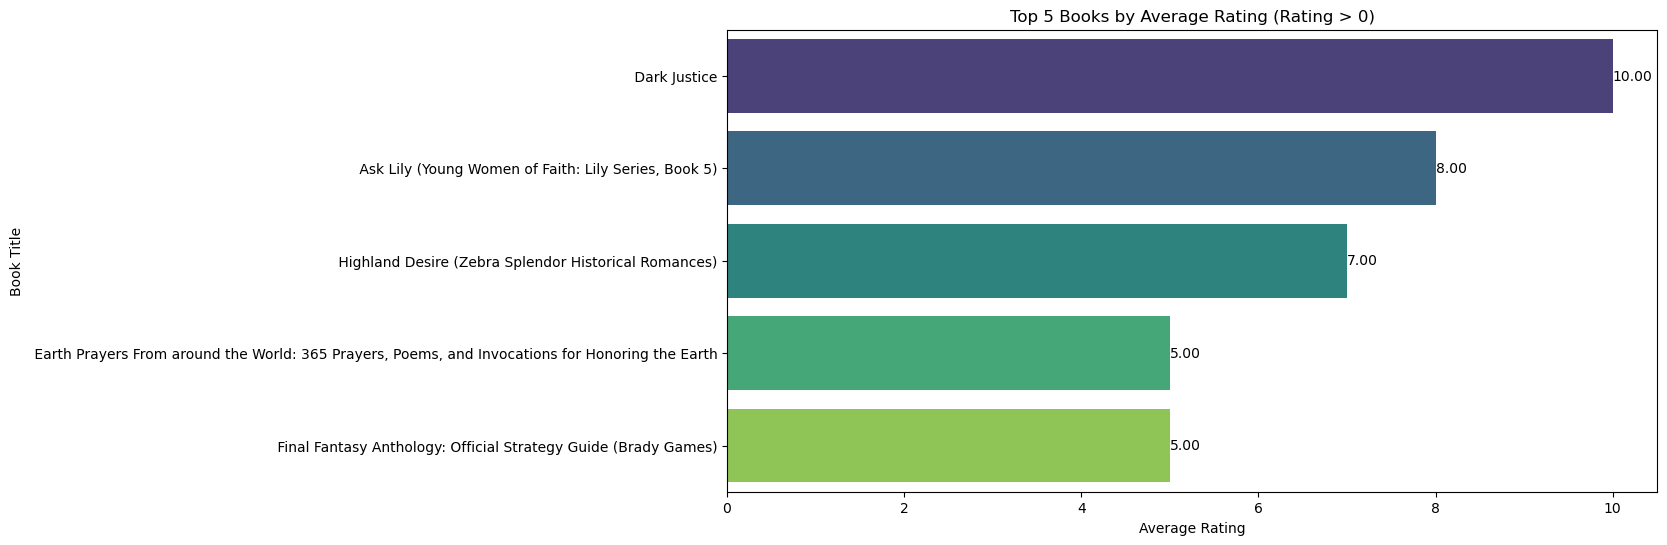

In [26]:
# Bar plot to show top 5 books by average rating (greater than 0)
avg_rating_df = ratings_with_name.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df.head(10)
# Filter the DataFrame for books with average ratings greater than 0
data_to_plot = avg_rating_df.head(20)
filtered_avg_rating_df = data_to_plot[data_to_plot['avg_rating'] > 0]

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='avg_rating', y='Book-Title', data=filtered_avg_rating_df.sort_values(by='avg_rating', ascending=False).head(5), palette='viridis')

# Annotate each bar with its rating
for index, value in enumerate(filtered_avg_rating_df.sort_values(by='avg_rating', ascending=False).head(5)['avg_rating']):
    bar_plot.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.title('Top 5 Books by Average Rating (Rating > 0)')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()

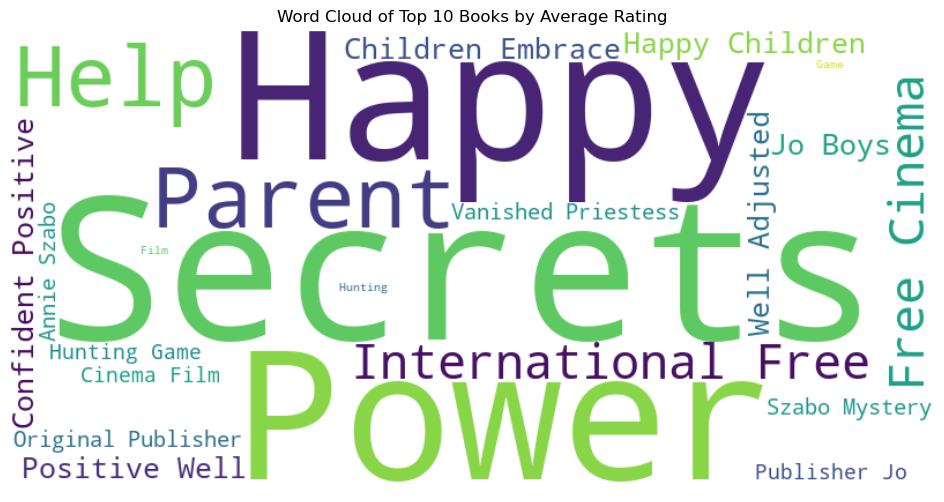

In [28]:
# Display the word cloud using matplotlib
top_10_avg_rating = avg_rating_df.sort_values(by='avg_rating', ascending=False).head(5)
top_10_avg_rating
# pip install wordcloud
from wordcloud import WordCloud
# Create a string containing book titles proportional to their average ratings
text = ' '.join((title + ' ') * int(rating) for title, rating in zip(top_10_avg_rating['Book-Title'], top_10_avg_rating['avg_rating']))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 10 Books by Average Rating')
plt.show()

### Gaussian Process Regression (GPR)

In [29]:
# pip install scikit-surprise

In [30]:
# from surprise import Reader, Dataset
# from surprise.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [31]:
# Load the dataset for collaborative filtering
collab_data = data[['User-ID', 'Book-Title', 'Book-Rating']]

In [32]:
# Label encoding for non-numeric features
label_encoder_user = LabelEncoder()
label_encoder_book = LabelEncoder()

collab_data['User-ID'] = label_encoder_user.fit_transform(collab_data['User-ID'])
collab_data['Book-Title'] = label_encoder_book.fit_transform(collab_data['Book-Title'])

C:\Users\Reshav\AppData\Local\Temp\ipykernel_17696\1235270146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collab_data['User-ID'] = label_encoder_user.fit_transform(collab_data['User-ID'])
C:\Users\Reshav\AppData\Local\Temp\ipykernel_17696\1235270146.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collab_data['Book-Title'] = label_encoder_book.fit_transform(collab_data['Book-Title'])


In [33]:
# Split the collaborative data into training and testing sets
train_data, test_data = train_test_split(collab_data, test_size=0.9, random_state=42)


In [34]:
# Extract features and labels for Gaussian Process Regression
X_train = np.array(list(zip(train_data['User-ID'], train_data['Book-Title'])))
y_train = np.array(train_data['Book-Rating'])

X_test = np.array(list(zip(test_data['User-ID'], test_data['Book-Title'])))
y_test = np.array(test_data['Book-Rating'])

In [35]:
# conda install -c intel mkl

In [36]:
# Gaussian Process Regression
kernel = 1.0 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1e-2)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

In [37]:
# Fit the model
gpr.fit(X_train, y_train)

C:\Users\Reshav\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=10)

In [38]:
# Predictions on the test set
y_pred, _ = gpr.predict(X_test, return_std=True)

In [39]:
y_pred

array([2.73893949, 2.79202664, 2.82593768, ..., 2.79849156, 2.75076798,
       2.82636733])

In [40]:
rmse_gpr = np.sqrt(mean_squared_error(y_test, y_pred))

In [41]:
rmse_gpr

3.8303947202274036

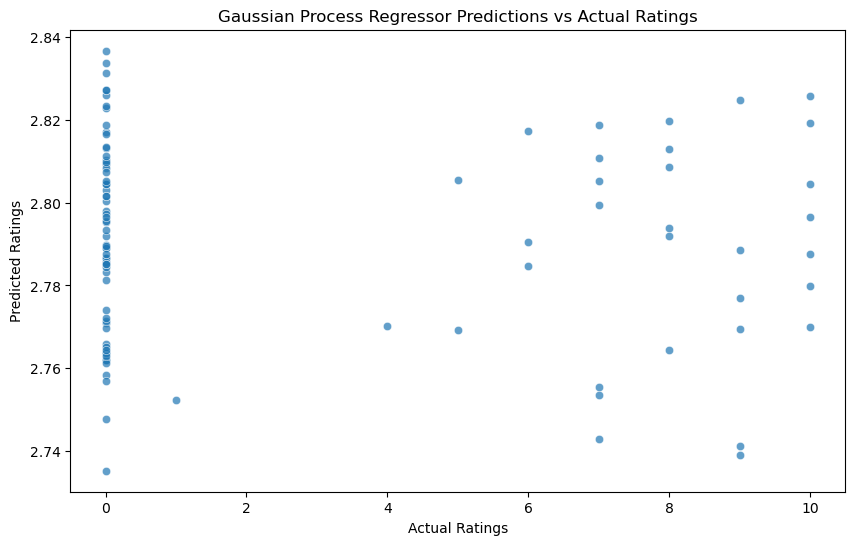

In [42]:
# Scatter plot for a subset of test data
subset_size = 100 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test[:subset_size], y=y_pred[:subset_size], alpha=0.7)
plt.title('Gaussian Process Regressor Predictions vs Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


### Classification Aspect

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
# Assuming 'Book-Author' is the key feature for classification
classification_data = df[['Book-Author', 'Book-Rating']].copy()

# Handling missing values
classification_data.dropna(inplace=True)

In [45]:
# Use only 10% of the data for training and testing
train_class, test_class = train_test_split(classification_data, test_size=0.3, random_state=42)

In [46]:
# TF-IDF for book titles
tfidf_vectorizer_class = TfidfVectorizer(stop_words='english')
tfidf_matrix_class = tfidf_vectorizer_class.fit_transform(train_class['Book-Author'])

In [47]:

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(tfidf_matrix_class, train_class['Book-Rating'])

MultinomialNB()

In [48]:
# Evaluate the classifier
test_tfidf_matrix_class = tfidf_vectorizer_class.transform(test_class['Book-Author'])

In [49]:
predictions = classifier.predict(test_tfidf_matrix_class)
accuracy_classification = accuracy_score(test_class['Book-Rating'], predictions)
print("Classification Accuracy:", accuracy_classification)

Classification Accuracy: 0.6247345162781526


In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
# Assuming 'predictions' contains the predicted ratings and 'test_class' contains the actual ratings
conf_matrix = confusion_matrix(test_class['Book-Rating'], predictions)

In [52]:
conf_matrix

array([[192715,      0,      0,      0,      0,     94,     41,    150,
           373,    128,    387],
       [   419,      0,      0,      0,      0,      0,      0,      1,
             1,      2,      0],
       [   678,      0,      0,      0,      0,      0,      0,      0,
             3,      2,      1],
       [  1549,      0,      0,      0,      0,      0,      0,      2,
             5,      2,      0],
       [  2287,      0,      0,      0,      0,      1,      0,      1,
             5,      2,      4],
       [ 13453,      0,      0,      0,      0,    101,      2,     19,
            35,     11,     31],
       [  9464,      0,      0,      0,      0,     10,      5,     12,
            28,     10,     25],
       [ 19820,      0,      0,      0,      0,     12,      6,     42,
            55,     14,     54],
       [ 27191,      0,      0,      0,      0,     12,      7,     28,
           105,     21,     85],
       [ 18150,      0,      0,      0,      0,      6,

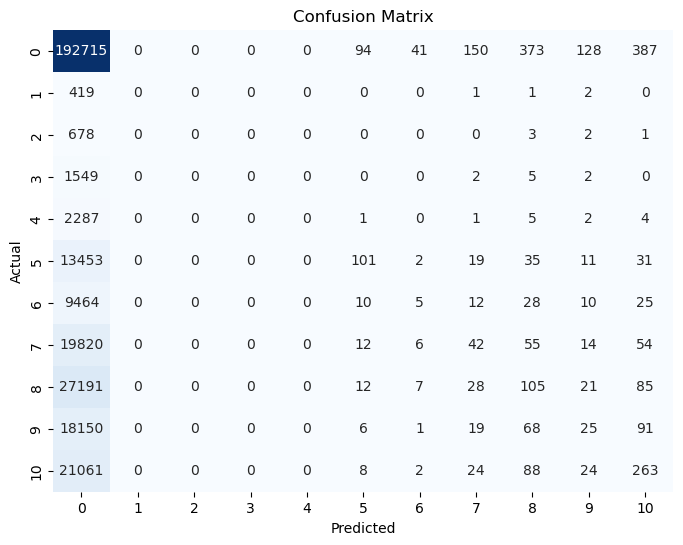

In [53]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(test_class['Book-Rating']),
            yticklabels=np.unique(test_class['Book-Rating']))

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()